***Criando uma árvore de decisão***

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import gc 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# método da árvore de decisão
def tree_decision(df):
    X = df.drop("Outcome",axis=1)
    y = df["Outcome"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    lasso = linear_model.Lasso()
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    
    print("Matrix de confusão")
    print(confusion_matrix(y_test, predictions))
    print('\n')
    print(classification_report(y_test, predictions))
    print('\n')
    
    cv_results = cross_validate(lasso, X, y, cv = 5, n_jobs = -1)
    print("Sorted")
    sorted(cv_results.keys())
    print("\n")
    print("mean test_score = {0}".format(cv_results["test_score"].mean()))
    print("\n")
    print("mean train_score = {0}".format(cv_results["train_score"].mean()))
    print("\n")
    print("mean score_time = {0}".format(cv_results["score_time"].mean()))
    print("\n")
    print("mean fit_time = {0}".format(cv_results["fit_time"].mean()))
    

In [4]:
df_file_diabets = pd.read_csv("../datasets/pima-indians-diabetes-database/diabetes.csv", sep=",")

In [5]:
df_file_diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:

# rodando a árvore de decisão sem nenhuma limpeza de dados

tree_decision(df_file_diabets)

Matrix de confusão
[[109  35]
 [ 40  47]]


              precision    recall  f1-score   support

           0       0.73      0.76      0.74       144
           1       0.57      0.54      0.56        87

   micro avg       0.68      0.68      0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.67      0.68      0.67       231



Sorted


mean test_score = 0.19731691956381409


mean train_score = 0.2135231392588274


mean score_time = 0.0012793540954589844


mean fit_time = 0.0032073974609375


/home/alison/.pyenv/versions/anaconda3-2019.03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [7]:
df_file_diabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


***Vou classificar os níveis de BMI de acordo com a tabela encontrada [aqui](http://ib.bioninja.com.au/standard-level/topic-2-molecular-biology/23-carbohydrates-and-lipids/body-mass-index.html)***    

*0 = abaixo do peso* 

*1 = peso normal* 

*2 = obeso nível 1*

*3 = obeso nível 2*

*4 = obeso nível 3*

*NaN se for abaixo de 10 de BMI, por que nem um bebe pode nascer com um BMI abaixo disso*

In [8]:
def classificBMI(BMI):
    if BMI > 10 and BMI < 18.5:
        return 0
    elif BMI > 18.4 and BMI < 25:
        return 1
    elif BMI > 24.9 and BMI < 30:
        return 2
    elif BMI > 29.9 and BMI < 35:
        return 3
    elif BMI > 34.9 and BMI < 40:
        return 4
    elif BMI > 40:
        return 5
    else:
        return -10

In [9]:
df_file_diabets["classificBMI"] = df_file_diabets['BMI'].apply(classificBMI)

In [10]:
df_file_diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,classificBMI
0,6,148,72,35,0,33.6,0.627,50,1,3
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,2
4,0,137,40,35,168,43.1,2.288,33,1,5
5,5,116,74,0,0,25.6,0.201,30,0,2
6,3,78,50,32,88,31.0,0.248,26,1,3
7,10,115,0,0,0,35.3,0.134,29,0,4
8,2,197,70,45,543,30.5,0.158,53,1,3
9,8,125,96,0,0,0.0,0.232,54,1,-10


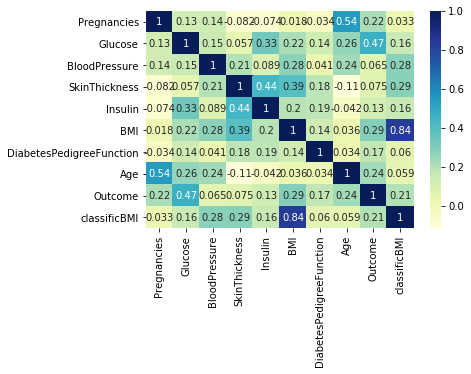

In [11]:

# verificando correlação entre um par de dados e os valores de positivo e negativo de Outcome

sns.heatmap(df_file_diabets.corr(), annot=True, cmap="YlGnBu")


In [12]:
# quantidade total de resultados positivos
df_file_diabets.query("Outcome == 1").any(axis=1).count()

268

**De acordo com este [material](https://www.diabetes.org.br/publico/vivendo-com-diabetes/mitos-e-verdades) médico existem pessoas magras com diábetes, ou seja o sobrepeso é um fator de risco mas não é determinante.**

In [13]:
#  Comparar os resultdados positivos para diabetes para o indice de BMI
df_file_diabets.query("Outcome == 1")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,classificBMI
0,6,148,72,35,0,33.6,0.627,50,1,3
2,8,183,64,0,0,23.3,0.672,32,1,1
4,0,137,40,35,168,43.1,2.288,33,1,5
6,3,78,50,32,88,31.0,0.248,26,1,3
8,2,197,70,45,543,30.5,0.158,53,1,3
9,8,125,96,0,0,0.0,0.232,54,1,-10
11,10,168,74,0,0,38.0,0.537,34,1,4
13,1,189,60,23,846,30.1,0.398,59,1,3
14,5,166,72,19,175,25.8,0.587,51,1,2
15,7,100,0,0,0,30.0,0.484,32,1,3


***Dados errados:***  
***A tarefa é não excluir nenhum objeto*** 

**1 - Verificar qual é a porcentagem de valores inconsistentes em cada atributo com zero**

*É impossível ter pressão sanguínea 0, como esse dado é muito relativo a cada paciente vou preencher de alguma forma*

In [14]:
df_file_diabets.query("Pregnancies == 0")["Pregnancies"].agg(['count'])

count    111
Name: Pregnancies, dtype: int64

In [15]:
df_file_diabets["Pregnancies"].value_counts(normalize=True)

1     0.175781
0     0.144531
2     0.134115
3     0.097656
4     0.088542
5     0.074219
6     0.065104
7     0.058594
8     0.049479
9     0.036458
10    0.031250
11    0.014323
13    0.013021
12    0.011719
14    0.002604
15    0.001302
17    0.001302
Name: Pregnancies, dtype: float64

In [16]:
# Foram encontrados 5 objetos com o valor 0 em Glicose
df_file_diabets.query("Glucose == 0")["Glucose"].agg(['count'])

count    5
Name: Glucose, dtype: int64

In [17]:
df_file_diabets["Glucose"].value_counts(normalize=True)

100    0.022135
99     0.022135
129    0.018229
125    0.018229
111    0.018229
106    0.018229
95     0.016927
108    0.016927
105    0.016927
102    0.016927
112    0.016927
122    0.015625
109    0.015625
107    0.014323
117    0.014323
90     0.014323
120    0.014323
114    0.014323
124    0.014323
128    0.014323
119    0.014323
115    0.013021
84     0.013021
91     0.011719
92     0.011719
123    0.011719
146    0.011719
126    0.011719
103    0.011719
101    0.011719
         ...   
75     0.002604
76     0.002604
77     0.002604
170    0.002604
195    0.002604
57     0.002604
174    0.002604
175    0.002604
188    0.002604
153    0.002604
159    0.002604
62     0.001302
72     0.001302
56     0.001302
44     0.001302
65     0.001302
61     0.001302
198    0.001302
67     0.001302
190    0.001302
149    0.001302
191    0.001302
186    0.001302
182    0.001302
178    0.001302
177    0.001302
172    0.001302
169    0.001302
160    0.001302
199    0.001302
Name: Glucose, Length: 1

In [18]:
# Foram encontrados 5 objetos com o valor 0 em BloodPressure
df_file_diabets.query("BloodPressure == 0")["BloodPressure"].agg(['count'])

count    35
Name: BloodPressure, dtype: int64

In [19]:
df_file_diabets["BloodPressure"].value_counts(normalize=True)

70     0.074219
74     0.067708
68     0.058594
78     0.058594
72     0.057292
64     0.055990
80     0.052083
76     0.050781
60     0.048177
0      0.045573
62     0.044271
66     0.039062
82     0.039062
88     0.032552
84     0.029948
90     0.028646
86     0.027344
58     0.027344
50     0.016927
56     0.015625
52     0.014323
54     0.014323
92     0.010417
75     0.010417
65     0.009115
94     0.007812
85     0.007812
48     0.006510
44     0.005208
96     0.005208
110    0.003906
100    0.003906
98     0.003906
106    0.003906
108    0.002604
104    0.002604
30     0.002604
55     0.002604
46     0.002604
40     0.001302
38     0.001302
24     0.001302
95     0.001302
61     0.001302
102    0.001302
114    0.001302
122    0.001302
Name: BloodPressure, dtype: float64

In [20]:
df_file_diabets.query("SkinThickness == 0")["SkinThickness"].agg(['count'])

count    227
Name: SkinThickness, dtype: int64

In [21]:
df_file_diabets["SkinThickness"].value_counts(normalize=True)

0     0.295573
32    0.040365
30    0.035156
27    0.029948
23    0.028646
33    0.026042
18    0.026042
28    0.026042
31    0.024740
39    0.023438
19    0.023438
29    0.022135
37    0.020833
26    0.020833
22    0.020833
40    0.020833
25    0.020833
35    0.019531
41    0.019531
36    0.018229
15    0.018229
17    0.018229
20    0.016927
24    0.015625
42    0.014323
13    0.014323
21    0.013021
34    0.010417
46    0.010417
38    0.009115
12    0.009115
14    0.007812
16    0.007812
11    0.007812
43    0.007812
45    0.007812
10    0.006510
44    0.006510
48    0.005208
47    0.005208
50    0.003906
49    0.003906
54    0.002604
52    0.002604
7     0.002604
8     0.002604
60    0.001302
56    0.001302
63    0.001302
51    0.001302
99    0.001302
Name: SkinThickness, dtype: float64

In [22]:
df_file_diabets.query("Insulin == 0")["Insulin"].agg(['count'])

count    374
Name: Insulin, dtype: int64

In [23]:
df_file_diabets["Insulin"].value_counts(normalize=True)

0      0.486979
105    0.014323
140    0.011719
130    0.011719
120    0.010417
100    0.009115
94     0.009115
180    0.009115
110    0.007812
115    0.007812
135    0.007812
66     0.006510
49     0.006510
56     0.006510
76     0.006510
210    0.006510
90     0.005208
88     0.005208
125    0.005208
71     0.005208
200    0.005208
155    0.005208
64     0.005208
160    0.005208
168    0.005208
165    0.005208
54     0.005208
190    0.005208
36     0.003906
182    0.003906
         ...   
191    0.001302
166    0.001302
188    0.001302
184    0.001302
171    0.001302
119    0.001302
255    0.001302
318    0.001302
91     0.001302
310    0.001302
81     0.001302
304    0.001302
300    0.001302
183    0.001302
86     0.001302
291    0.001302
89     0.001302
284    0.001302
280    0.001302
258    0.001302
278    0.001302
277    0.001302
275    0.001302
274    0.001302
272    0.001302
271    0.001302
270    0.001302
108    0.001302
112    0.001302
846    0.001302
Name: Insulin, Length: 1

In [24]:
df_file_diabets.query("BMI == 0")["BMI"].agg(['count'])

count    11
Name: BMI, dtype: int64

In [25]:
df_file_diabets["BMI"].value_counts(normalize=True)

32.0    0.016927
31.6    0.015625
31.2    0.015625
0.0     0.014323
33.3    0.013021
32.4    0.013021
32.8    0.011719
30.8    0.011719
32.9    0.011719
30.1    0.011719
29.7    0.010417
33.6    0.010417
34.2    0.010417
30.4    0.009115
35.5    0.009115
27.6    0.009115
33.2    0.009115
28.7    0.009115
25.9    0.009115
39.4    0.009115
30.0    0.009115
30.5    0.009115
27.8    0.009115
25.2    0.007812
36.8    0.007812
28.9    0.007812
34.9    0.007812
24.2    0.007812
34.3    0.007812
38.5    0.007812
          ...   
21.7    0.001302
21.2    0.001302
43.1    0.001302
45.4    0.001302
40.7    0.001302
45.2    0.001302
24.1    0.001302
44.1    0.001302
29.2    0.001302
38.6    0.001302
67.1    0.001302
41.2    0.001302
26.7    0.001302
48.8    0.001302
49.6    0.001302
46.7    0.001302
41.8    0.001302
22.7    0.001302
24.9    0.001302
40.8    0.001302
57.3    0.001302
31.1    0.001302
53.2    0.001302
46.3    0.001302
36.2    0.001302
32.1    0.001302
52.9    0.001302
31.3    0.0013

In [26]:
df_file_diabets.query("DiabetesPedigreeFunction == 0")["DiabetesPedigreeFunction"].agg(['count'])

count    0
Name: DiabetesPedigreeFunction, dtype: int64

In [27]:
df_file_diabets.query("Age == 0")["Age"].agg(['count'])

count    0
Name: Age, dtype: int64

In [28]:
df_file_diabets.query("classificBMI == -10")["classificBMI"].agg(['count'])

count    13
Name: classificBMI, dtype: int64

In [29]:
df_file_diabets["classificBMI"].value_counts(normalize=True)

 3     0.291667
 2     0.233073
 4     0.195312
 1     0.132812
 5     0.125000
-10    0.016927
 0     0.005208
Name: classificBMI, dtype: float64

***A Insulina é o atributo que tem o maior valor estatistico com valor zero e por isso que vou focar nela primeiro***

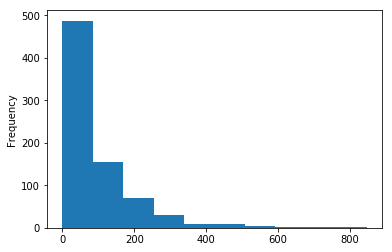

In [30]:
df_file_diabets['Insulin'].plot.hist()

In [31]:
healthy = df_file_diabets.query("Outcome == 0")

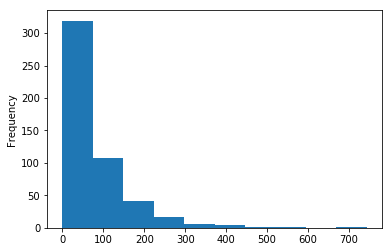

In [32]:
healthy["Insulin"].plot.hist()

In [33]:
not_healthy = df_file_diabets.query("Outcome == 1")

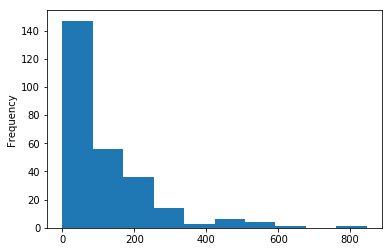

In [34]:
not_healthy["Insulin"].plot.hist()

In [35]:
not_healthy["Insulin"].describe()

count    268.000000
mean     100.335821
std      138.689125
min        0.000000
25%        0.000000
50%        0.000000
75%      167.250000
max      846.000000
Name: Insulin, dtype: float64

In [36]:
#not_healthy.loc[not_healthy['Insulin'] == 0, ["Insulin"]].loc[not_healthy['Age'] > 30] = not_healthy["Insulin"].mean()

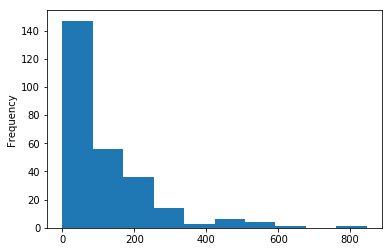

In [37]:
not_healthy["Insulin"].plot.hist()

In [38]:
not_healthy_index = df_file_diabets.query("Outcome == 1 and Insulin == 0").index

In [39]:
df_file_diabets.iloc[not_healthy_index, 4] = not_healthy["Insulin"].mean()

In [40]:
df_file_diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,classificBMI
0,6,148,72,35,100.335821,33.6,0.627,50,1,3
1,1,85,66,29,0.000000,26.6,0.351,31,0,2
2,8,183,64,0,100.335821,23.3,0.672,32,1,1
3,1,89,66,23,94.000000,28.1,0.167,21,0,2
4,0,137,40,35,168.000000,43.1,2.288,33,1,5
5,5,116,74,0,0.000000,25.6,0.201,30,0,2
6,3,78,50,32,88.000000,31.0,0.248,26,1,3
7,10,115,0,0,0.000000,35.3,0.134,29,0,4
8,2,197,70,45,543.000000,30.5,0.158,53,1,3
9,8,125,96,0,100.335821,0.0,0.232,54,1,-10


In [41]:
healthy_index = df_file_diabets.query("Outcome == 0 and Insulin == 0").index

In [42]:
df_file_diabets.iloc[healthy_index, 4] = healthy["Insulin"].mean()

In [43]:
df_file_diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,classificBMI
0,6,148,72,35,100.335821,33.6,0.627,50,1,3
1,1,85,66,29,68.792000,26.6,0.351,31,0,2
2,8,183,64,0,100.335821,23.3,0.672,32,1,1
3,1,89,66,23,94.000000,28.1,0.167,21,0,2
4,0,137,40,35,168.000000,43.1,2.288,33,1,5
5,5,116,74,0,68.792000,25.6,0.201,30,0,2
6,3,78,50,32,88.000000,31.0,0.248,26,1,3
7,10,115,0,0,68.792000,35.3,0.134,29,0,4
8,2,197,70,45,543.000000,30.5,0.158,53,1,3
9,8,125,96,0,100.335821,0.0,0.232,54,1,-10


In [44]:
def mean_insulin_patient_positive(list_parameters):
    print(list_parameters)
    if list_parameters[0].get == 1:
        if list_parameters[1] == 0:
            return 100
        else:
            list_parameters[1]
    return list_parameters[1]

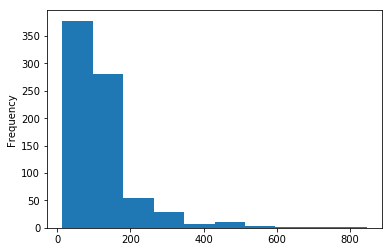

In [45]:
df_file_diabets["Insulin"].plot.hist()

In [46]:
tree_decision(df_file_diabets)

Matrix de confusão
[[131  16]
 [ 11  73]]


              precision    recall  f1-score   support

           0       0.92      0.89      0.91       147
           1       0.82      0.87      0.84        84

   micro avg       0.88      0.88      0.88       231
   macro avg       0.87      0.88      0.88       231
weighted avg       0.89      0.88      0.88       231



Sorted


mean test_score = 0.19938526919280658


mean train_score = 0.2183466509303213


mean score_time = 0.0014571189880371095


mean fit_time = 0.0034047603607177735


/home/alison/.pyenv/versions/anaconda3-2019.03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [47]:
gc.collect()

131

***Agora vou atacar o segundo atributo que mais tem valores inconsistentes, que é o SkinThickness***

In [48]:
# separando os objetos referentes a saúdavel e não saúdavel
heathy_atributes_all = df_file_diabets.query("Outcome == 1")
not_heathy_atributes_all = df_file_diabets.query("Outcome == 0")

In [49]:
# colocando a média de SkinThickness para as pessoas saúdaveis 

SkinThickness_healthy_index = df_file_diabets.query("SkinThickness == 0 and Outcome == 0").index

df_file_diabets.iloc[SkinThickness_healthy_index, 3] = heathy_atributes_all["SkinThickness"].mean()

df_file_diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,classificBMI
0,6,148,72,35.000000,100.335821,33.6,0.627,50,1,3
1,1,85,66,29.000000,68.792000,26.6,0.351,31,0,2
2,8,183,64,0.000000,100.335821,23.3,0.672,32,1,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0,2
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1,5
5,5,116,74,22.164179,68.792000,25.6,0.201,30,0,2
6,3,78,50,32.000000,88.000000,31.0,0.248,26,1,3
7,10,115,0,22.164179,68.792000,35.3,0.134,29,0,4
8,2,197,70,45.000000,543.000000,30.5,0.158,53,1,3
9,8,125,96,0.000000,100.335821,0.0,0.232,54,1,-10


In [50]:
# colocando a média de SkinThickness para pessoas não saúdaveis

SkinThickness_not_healthy_index = df_file_diabets.query("SkinThickness == 0 and Outcome ==1").index

df_file_diabets.iloc[SkinThickness_not_healthy_index, 3] = heathy_atributes_all["SkinThickness"].mean()

df_file_diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,classificBMI
0,6,148,72,35.000000,100.335821,33.6,0.627,50,1,3
1,1,85,66,29.000000,68.792000,26.6,0.351,31,0,2
2,8,183,64,22.164179,100.335821,23.3,0.672,32,1,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0,2
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1,5
5,5,116,74,22.164179,68.792000,25.6,0.201,30,0,2
6,3,78,50,32.000000,88.000000,31.0,0.248,26,1,3
7,10,115,0,22.164179,68.792000,35.3,0.134,29,0,4
8,2,197,70,45.000000,543.000000,30.5,0.158,53,1,3
9,8,125,96,22.164179,100.335821,0.0,0.232,54,1,-10


In [51]:
tree_decision(df_file_diabets)

Matrix de confusão
[[143  11]
 [ 13  64]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       154
           1       0.85      0.83      0.84        77

   micro avg       0.90      0.90      0.90       231
   macro avg       0.89      0.88      0.88       231
weighted avg       0.90      0.90      0.90       231



Sorted


mean test_score = 0.19938526919280658


mean train_score = 0.2183466509303213


mean score_time = 0.0017560482025146484


mean fit_time = 0.003181123733520508


/home/alison/.pyenv/versions/anaconda3-2019.03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


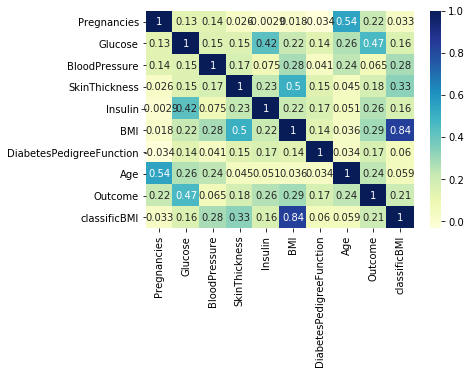

In [52]:
sns.heatmap(df_file_diabets.corr(), annot=True, cmap="YlGnBu")

In [53]:
df_file_diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,classificBMI
0,6,148,72,35.000000,100.335821,33.6,0.627,50,1,3
1,1,85,66,29.000000,68.792000,26.6,0.351,31,0,2
2,8,183,64,22.164179,100.335821,23.3,0.672,32,1,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0,2
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1,5


In [54]:
df_file_diabets.drop("BMI", axis=1, inplace=True)

In [55]:
tree_decision(df_file_diabets)

Matrix de confusão
[[133  13]
 [ 17  68]]


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.84      0.80      0.82        85

   micro avg       0.87      0.87      0.87       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231



Sorted


mean test_score = 0.19938526919280658


mean train_score = 0.2183466509303213


mean score_time = 0.0020653247833251954


mean fit_time = 0.004338693618774414


/home/alison/.pyenv/versions/anaconda3-2019.03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [56]:
df_file_diabets.drop("Pregnancies", axis=1, inplace=True)

In [57]:
tree_decision(df_file_diabets)

Matrix de confusão
[[130  17]
 [ 15  69]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       147
           1       0.80      0.82      0.81        84

   micro avg       0.86      0.86      0.86       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.86      0.86      0.86       231



Sorted


mean test_score = 0.19938526919280658


mean train_score = 0.2183466509303213


mean score_time = 0.0013811111450195313


mean fit_time = 0.003207874298095703


/home/alison/.pyenv/versions/anaconda3-2019.03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
